# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
%matplotlib inline
# import numpy and pandas
import numpy as np
import pandas as pd

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
# Your code here:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [22]:
# Your code here:
fifa['ValueNumeric'] = fifa['Value'].str.replace('M','').str.replace('K','').str.replace('€','').astype(float)

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [27]:
# Your code here:
import statsmodels.formula.api as smf

anova = smf.ols(formula='fifa["ValueNumeric"] ~ C(fifa["Preferred Foot"])+C(fifa["Position"])', data=fifa).fit()

print(anova.summary())

                             OLS Regression Results                             
Dep. Variable:     fifa["ValueNumeric"]   R-squared:                       0.006
Model:                              OLS   Adj. R-squared:                  0.004
Method:                   Least Squares   F-statistic:                     4.020
Date:                  Fri, 09 Oct 2020   Prob (F-statistic):           1.07e-11
Time:                          18:30:10   Log-Likelihood:            -1.2858e+05
No. Observations:                 18147   AIC:                         2.572e+05
Df Residuals:                     18119   BIC:                         2.574e+05
Df Model:                            27                                         
Covariance Type:              nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

What is your conclusion from this ANOVA?

In [6]:
# Your conclusions here:
"""
As we see: Prob (F-statistic):1.07e-11 so Pvalue is lower than 0.05.
Therefore we reject the hypotesis and confirm variances are different
"""

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [30]:
# Your code here:
anova = smf.ols(formula='fifa["ValueNumeric"] ~ C(fifa["Nationality"])', data=fifa).fit()

print(anova.summary())

                             OLS Regression Results                             
Dep. Variable:     fifa["ValueNumeric"]   R-squared:                       0.028
Model:                              OLS   Adj. R-squared:                  0.019
Method:                   Least Squares   F-statistic:                     3.203
Date:                  Fri, 09 Oct 2020   Prob (F-statistic):           1.98e-38
Time:                          18:34:48   Log-Likelihood:            -1.2878e+05
No. Observations:                 18207   AIC:                         2.579e+05
Df Residuals:                     18043   BIC:                         2.592e+05
Df Model:                           163                                         
Covariance Type:              nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

What is your conclusion from this ANOVA?

In [ ]:
"""
As we see: Prob (F-statistic):1.98e-38 so Pvalue is lower than 0.05.
Therefore we also reject the hypotesis and confirm variances are different
"""

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [60]:
# Your code here:
fifa.isnull().sum()

Name              0
Age               0
Nationality       0
Overall           0
Potential         0
Club              0
Value             0
Preferred Foot    0
Position          0
Weak Foot         0
Acceleration      0
SprintSpeed       0
Stamina           0
Strength          0
LongShots         0
Aggression        0
Interceptions     0
Positioning       0
Vision            0
Penalties         0
ValueNumeric      0
dtype: int64

In [61]:
fifa.dropna(inplace=True)

In [62]:
fifa.isna().sum()

Name              0
Age               0
Nationality       0
Overall           0
Potential         0
Club              0
Value             0
Preferred Foot    0
Position          0
Weak Foot         0
Acceleration      0
SprintSpeed       0
Stamina           0
Strength          0
LongShots         0
Aggression        0
Interceptions     0
Positioning       0
Vision            0
Penalties         0
ValueNumeric      0
dtype: int64

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

-

some info here to undersant why we would add a constant:

By default, statsmodels fits a line passing through the origin, i.e. it doesn't fit an intercept. Hence, you need to use thecommand 'add_constant' so that it also fits an intercept.

-

In [64]:
# Your code here:

# Definir variables
X = sm.add_constant(fifa[['Stamina', 'SprintSpeed']])
y = fifa.ValueNumeric

# fit 
model = sm.OLS(y, X).fit()
# pred
predict = model.predict(X)

print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.454
Date:                Sat, 10 Oct 2020   Prob (F-statistic):             0.0116
Time:                        16:09:41   Log-Likelihood:            -1.2702e+05
No. Observations:               17918   AIC:                         2.540e+05
Df Residuals:                   17915   BIC:                         2.541e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         280.4297     10.390     26.991      

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [ ]:
# Your conclusions here:
"""

F-statistic
- Indicates the relationship between our predictor and the response variables. Better if it's furter than 1.
- Larger than 1 we reject the null hypothesis and so there no relationship between variables, so they are not jointly significant.
- As F-statistic= 4.454 we say that variables are not jointly significant


R-squared (R2) 
- Provides a measure of how well the model is fitting the actual data
- As R2 = 0.000 we say that no variation is predicted by the model


"""

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [66]:
# Your code here:

# Definir variables
X = sm.add_constant(fifa["Potential"])
y = fifa.ValueNumeric

# fit 
model = sm.OLS(y, X).fit()
# pred
predict = model.predict(X)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1054.
Date:                Sat, 10 Oct 2020   Prob (F-statistic):          9.15e-225
Time:                        16:17:36   Log-Likelihood:            -1.2651e+05
No. Observations:               17918   AIC:                         2.530e+05
Df Residuals:                   17916   BIC:                         2.530e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1062.4312     24.547     43.281      0.0

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [13]:
# Your conclusions here:

"""

F-statistic
- Indicates the relationship between our predictor and the response variables. Better if it's furter than 1.
- Larger than 1 we reject the null hypothesis and so there no relationship between variables, so they are not jointly significant.
- As F-statistic= 1054. we say that variables are not jointly significant
- As Prob (F-statistic): 9.15e-225 < 0,05 we reject the H0

R-squared (R2) 
- Provides a measure of how well the model is fitting the actual data
- As R2 = 0.056 we can't use this model to predict.

Final Result:
The null hypothesis of the test is that the fit of the intercept-only model and the specified model is equal. 
If the null hypothesis can be rejected, this implies that the specified model has a better fit than the null model.

"""

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

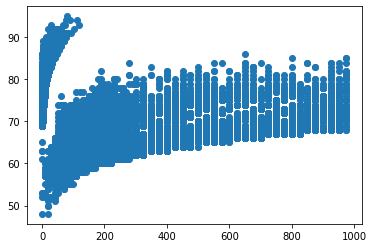

In [67]:
# Your code here:
plt.scatter(x=fifa.ValueNumeric, y=fifa.Potential);